Exercicio Análise de Dados

In [110]:
import pandas as pd
import seaborn as sns
import statistics as sts
import warnings
warnings.filterwarnings('ignore')

In [111]:
# Importar e visualizar dados 
dataset = pd.read_csv("tempo.csv", sep=";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [112]:
# Tamanho do dataframe
dataset.shape

(14, 5)

In [113]:
# Dados categoricos
# Aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

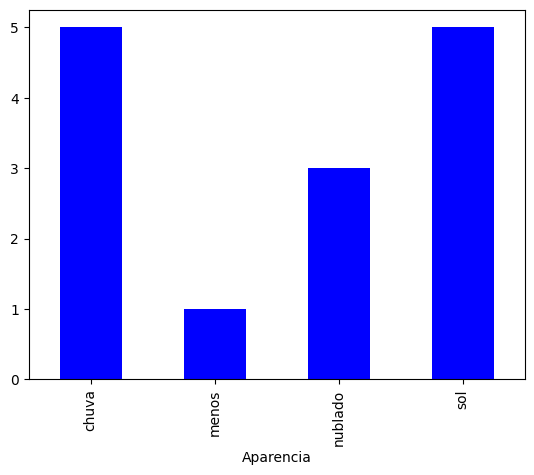

In [114]:
agrupado.plot.bar(color = 'blue')

In [115]:
# Dados categoricos
# Vento
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

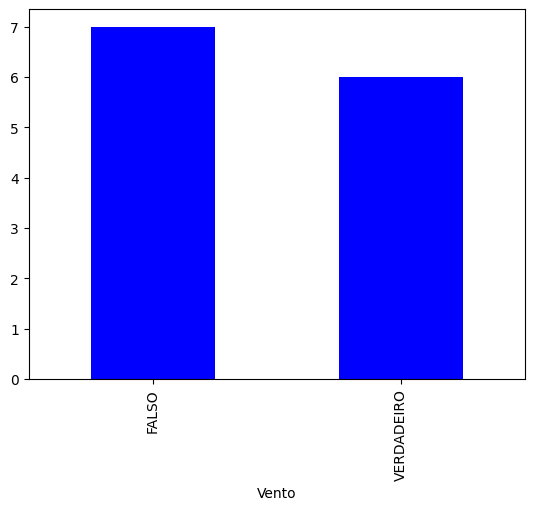

In [116]:
agrupado.plot.bar(color = 'blue')

In [117]:
# Dados categoricos
# Vento
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

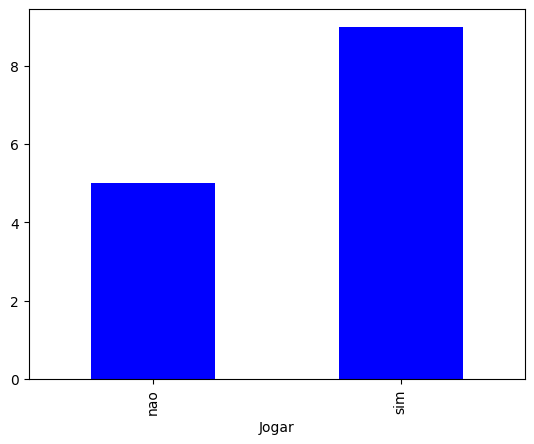

In [118]:
agrupado.plot.bar(color = 'blue')

In [119]:
# Dados Númericos
# Temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

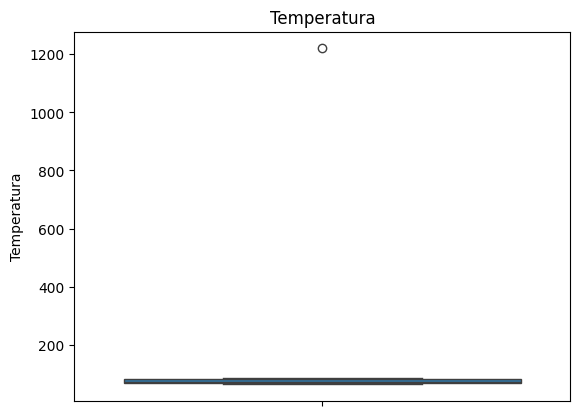

In [120]:
sns.boxplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

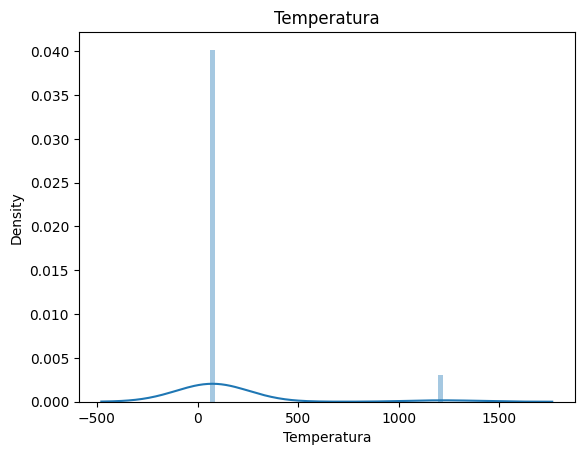

In [121]:
import seaborn as sns

# FILEPATH: /d:/Clone_Jupyter_Notebook_Github/Analise_de_dados_Jupyter_Notebook/Exercicios_ Análise_de_Dados/Exercicio Análise de Dados.ipynb
sns.distplot(dataset['Temperatura']).set_title('Temperatura')

In [122]:
# Dados Númericos
# Temperatura
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

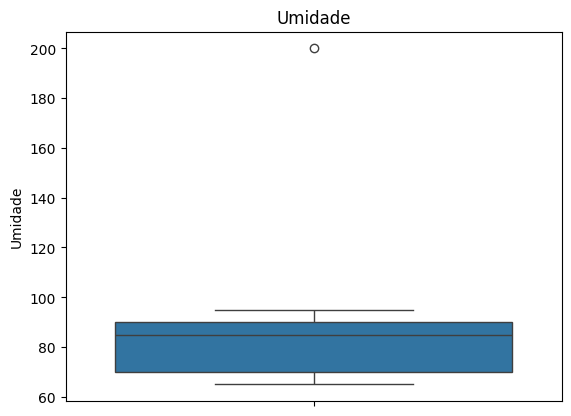

In [123]:
sns.boxplot(dataset['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Umidade')

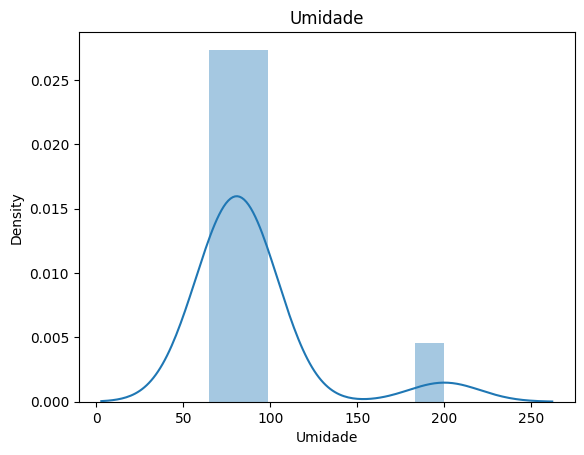

In [124]:
sns.distplot(dataset['Umidade']).set_title('Umidade')

In [125]:
# Verificando valores NaN
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [126]:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [127]:
# Padronização de acordo com as temperaturas
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = "sol"

# Visualiza os resultados
agrupado = dataset.groupby(["Aparencia"]).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [128]:
# Temperatura

# Verifica as temperaturas fora do dominio
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [129]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [130]:
# Temperatura

# Calcula e mostra a mediana de Temperatura
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [131]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)] = mediana

In [132]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [133]:
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
73.5     1
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
200.0    1
dtype: int64

In [134]:
dataset['Umidade'].isnull().sum()

1

In [135]:
#calular a mediana
mediana = sts.median(dataset['Umidade'])
mediana

82.5

In [136]:
# Substituir pela mediana
dataset['Umidade'].fillna(mediana, inplace=True)

In [137]:
# Verificando valores NaN
dataset['Umidade'].isnull().sum()

0

In [138]:
dataset.loc[(dataset['Umidade'] <  0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [139]:
dataset.loc[(dataset['Umidade'] <  0) | (dataset['Umidade'] > 100)] = mediana

In [140]:
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [141]:
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
73.5          1
82.5          1
FALSO         6
VERDADEIRO    6
dtype: int64

In [142]:
dataset['Vento'].isnull().sum()

0

In [143]:
dataset['Vento'].fillna('Falso', inplace=True)

In [144]:
dataset['Vento'].isnull().sum()

0

In [145]:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,82.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,73.5,73.5,73.5,73.5,73.5
8,sol,69.0,70.0,FALSO,sim
9,82.5,82.5,82.5,82.5,82.5
